In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
df= pd.read_csv('D:\\Python Project\\level1\\height\\weight-height.csv')

In [3]:
# Lets see what we got in df. head prints by default 5 rows.
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.isnull().sum() # As we can see, there is no null values so we dont have to take care of missing values, which is abig relief.

Gender    0
Height    0
Weight    0
dtype: int64

### Visualization

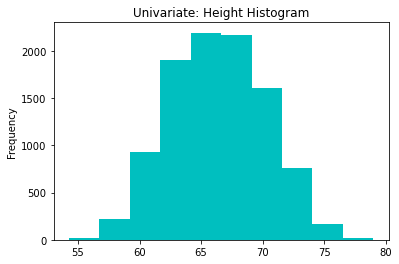

In [5]:
# Lets draw a basic histogram. 
df.Height.plot(kind="hist", title='Univariate: Height Histogram', color='c');

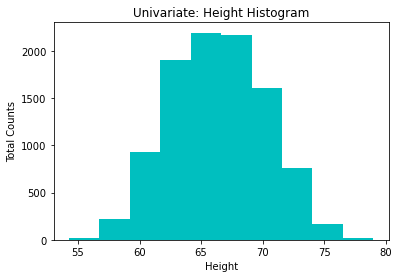

In [6]:
# univariate distribution
#Above histogram same we can do with matplotlib also. Matplotlib allows you to write more flexible code
# title again means you plot name.
# xlabel means label on x-axis and ylabel for y-axis
# bins will be explained in the next plot
plt.hist(x=df.Height, color='c')
plt.title("Univariate: Height Histogram")
plt.xlabel("Height")
plt.ylabel("Total Counts")
plt.plot();

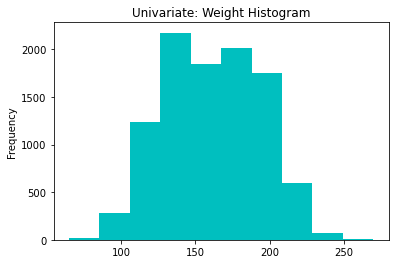

In [7]:
# Lets draw a basic histogram. 
df.Weight.plot(kind="hist", title='Univariate: Weight Histogram', color='c');

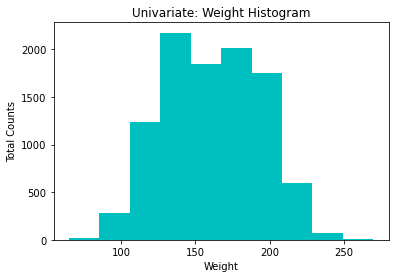

In [8]:
# Weight histogram using matplotlib 
plt.hist(x=df.Weight, color='c')
plt.title("Univariate: Weight Histogram")
plt.xlabel("Weight")
plt.ylabel("Total Counts")
plt.plot();

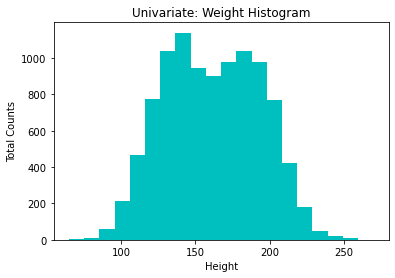

In [9]:
plt.hist(x=df.Weight, color='c', bins=20)
plt.title("Univariate: Weight Histogram")
plt.xlabel("Height")
plt.ylabel("Total Counts")
plt.plot();

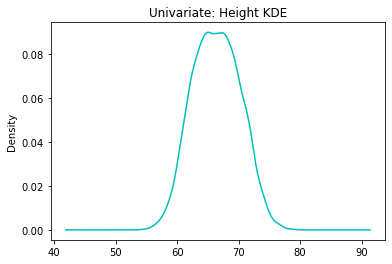

In [10]:
# KDE distribution for Height
df.Height.plot(kind="kde", title='Univariate: Height KDE', color='c');

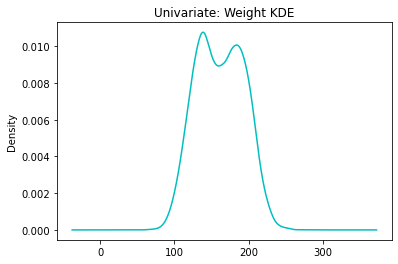

In [11]:
# KDE distribution for Weight
df.Weight.plot(kind="kde", title='Univariate: Weight KDE', color='c');

In [12]:
# So you can imagine KDE as the outline of histogram.
# KDE is more smoother and it gives you a bell shape curve.

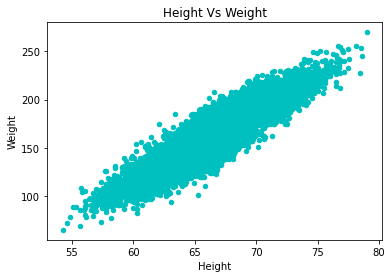

In [13]:
# So here we are plotting a  bivariate plot type called scatter plot between height and weight.
# x = data to show in x-axis(numeric)
# y = data to show in y-axis(numeric)
# color: color of the dots
# title: name for your plot
df.plot.scatter(x="Height", y="Weight", color='c', title='Height Vs Weight');

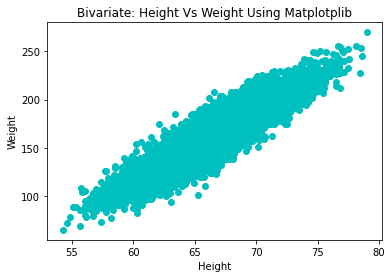

In [14]:
# lets do same with matplotlib
plt.scatter(x=df["Height"], y=df["Weight"], color='c')
plt.title("Bivariate: Height Vs Weight Using Matplotplib")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.plot(); # this means now plot the visualisation with all the settings.

### Regression - Predict Weight Using Height

In [15]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [16]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2:3].values

In [17]:
# First lets split our data
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

Linear Regressor Model

In [19]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
model_fit = regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)

In [20]:
y_predict

array([[163.3254169 ],
       [172.4561169 ],
       [141.93545547],
       ...,
       [183.17868191],
       [151.35818679],
       [140.9103195 ]])

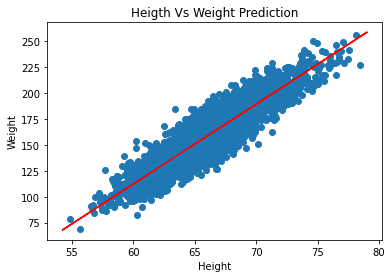

In [21]:
plt.scatter(X_test, y_test)
plt.plot( X_train, regressor.predict(X_train), color='r')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Heigth Vs Weight Prediction")
plt.show()

So you can see our regression line is finely fitting our data points.
blue points are actual values & points on red line are predicted values.

### Accuracy

In [22]:
# To find accuracy of model we have many metries like 
# R-square, mean-squared-error(MSE), root-mean-squared-error(RMSE)

In [23]:
from sklearn.metrics import r2_score

In [24]:
print(f"Model Accuracy is: {regressor.score(X_test, y_test)}")

Model Accuracy is: 0.8518184505555159


In [25]:
r2_score(y_test, y_predict)

0.8518184505555159

#### Classification - Predict Gender By Height & Weight

In [26]:
# Previously we saw how to predict Weigth by Height, which is simple because:
# 1. Both were numeric values
# 2. There was only one independent variable or feature(Height).
# 3. Previously we were finding continues value like Weight but now we are finding discrete values like Male or Female. So
# here we will use classification.
# Now we wil talk about KNN classification. Here we will use two features(Heigth & Weigth) to predict Gender.

In [27]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [28]:
X_ml = df.iloc[:, 1:3].values
y_ml = df.iloc[:, 0:1].values

In [29]:
X_ml.shape

(10000, 2)

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
encoder = LabelEncoder()

In [32]:
y_ml = encoder.fit_transform(y_ml)

D:\Users\Sushmita Swain\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [33]:
y_ml # so we can see now our string values are encoded. Male as 1 & Female as 0

array([1, 1, 1, ..., 0, 0, 0])

In [34]:
y_ml.shape

(10000,)

In [35]:
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(X_ml, y_ml, test_size=0.3, random_state=31)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3) #n_neighbors is the number of neighbours

In [37]:
knn.fit(X_train_ml, y_train_ml)

KNeighborsClassifier(n_neighbors=3)

In [38]:
y_predict_ml = knn.predict(X_test_ml)

In [39]:
y_predict_ml # So you can see now our model is classifying the gender

array([0, 1, 0, ..., 1, 0, 0])

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
confusion_matrix(y_test_ml, y_predict_ml)

array([[1315,  157],
       [ 138, 1390]], dtype=int64)

In [42]:
knn = KNeighborsClassifier(n_neighbors=5) #n_neighbors is the number of neighbours
knn.fit(X_train_ml, y_train_ml)
y_predict_ml = knn.predict(X_test_ml)
cm = confusion_matrix(y_test_ml, y_predict_ml)
cm

array([[1330,  142],
       [ 135, 1393]], dtype=int64)

In [43]:
print("accuracy:", knn.score(X_test_ml, y_test_ml)) 

accuracy: 0.9076666666666666


accuracy of 90% which is a very good number. But let see can we increase this

### Improved Model 

In [44]:
from sklearn.model_selection import GridSearchCV
# below is the params dictionary object. Here we can add the parameters which we can experiment with. so now our model will get evaluated with all the possible 
# combination of below params and let you the best score and param combination.
params = {
    "n_neighbors": [5, 10, 20],
    'leaf_size' : [30, 40, 50],
    'algorithm': ["ball_tree", "kd_tree", "brute"],
    'p': [1, 2]
}
gs = GridSearchCV(estimator=knn, cv=10, param_grid=params )

In [45]:
gsresult = gs.fit(X_train_ml, y_train_ml ) # it may take a while as grid search cv will run your mode with all the possible combinations of given params.

In [46]:
print(gsresult.best_score_) # So you can see we increased accuracy with more than 1% for training data.
print(gsresult.best_params_) # So this is the best possible combination for our model. Lets try with that.

0.9190000000000002
{'algorithm': 'ball_tree', 'leaf_size': 30, 'n_neighbors': 20, 'p': 1}


In [47]:
knn_best_fit = KNeighborsClassifier(algorithm = "ball_tree", leaf_size= 30, n_neighbors = 20, p=1)
knn_best_fit.fit(X_train_ml, y_train_ml)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=20, p=1)

In [48]:
y_predict_best = knn_best_fit.predict(X_test_ml)

In [49]:
cm_best = confusion_matrix(y_test_ml, y_predict_best)
cm_best

array([[1352,  120],
       [ 133, 1395]], dtype=int64)

In [50]:
print("accuracy:", knn.score(X_test_ml, y_predict_best)) # accuracy of our new model is 97% which means 7% more than our old model for unseen data or test data, which is amazing.
# So here we will stop with this configuration.

accuracy: 0.9706666666666667


### Plot Confusion Matrix

<AxesSubplot:>

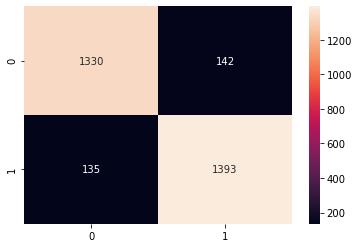

In [51]:
# Though we can see our confusion matrix but it is always good to plot it in a user friendly way.
sns.heatmap(cm, annot=True, fmt='g')

<AxesSubplot:>

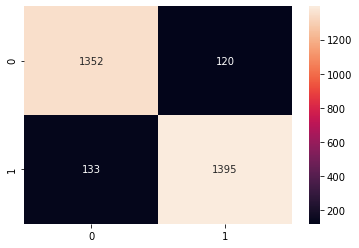

In [56]:
sns.heatmap(cm_best, annot=True, fmt='g')